In [1]:
# Import categorized 'names_cat.csv'
import pandas

print("Importing names... ")
names = pandas.read_csv("data/names_cat.csv", usecols=["name", "n_publs", "likely_gender", "score"])

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
names = names.set_index("name", drop = False)
print("Names imported. They look like this: {}".format(names[:10]))

Importing names... 
Names imported. They look like this:                                         name  n_publs likely_gender  score
name                                                                      
'Maseka Lesaoana            'Maseka Lesaoana        2        female      8
(David) Jing Dai            (David) Jing Dai        1          male      7
(Max) Zong-Ming Cheng  (Max) Zong-Ming Cheng        2          male      2
(Sophy) Shu-Jiun Chen  (Sophy) Shu-Jiun Chen        2        female      7
(Zhou) Bryan Bai            (Zhou) Bryan Bai        2          male      6
A Clara Kanmani              A Clara Kanmani        1        female      4
A Lun                                  A Lun        1          male      1
A Min Tjoa                        A Min Tjoa      211          male      2
A S Akshaya                      A S Akshaya        1          male      2
A'ang Subiyakto              A'ang Subiyakto        2        female      0


In [2]:
names.describe()

,n_publs,score
count,2.306418e+06,2.306418e+06
mean,5.789820e+00,4.963300e+00
std,1.827144e+01,3.506927e+00
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00
50%,2.000000e+00,4.000000e+00
75%,4.000000e+00,7.000000e+00
max,1.694000e+03,3.300000e+01


In [3]:
names[names['likely_gender'] == 'female'].describe()

,n_publs,score
count,386996.000000,386996.000000
mean,4.179795,3.104802
std,12.441453,2.647863
min,1.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,3.000000
75%,3.000000,4.000000
max,946.000000,29.000000


In [4]:
names[names['likely_gender'] == 'male'].describe()

,n_publs,score
count,1.919422e+06,1.919422e+06
mean,6.114435e+00,5.338012e+00
std,1.921768e+01,3.539459e+00
min,1.000000e+00,0.000000e+00
25%,1.000000e+00,2.000000e+00
50%,2.000000e+00,5.000000e+00
75%,4.000000e+00,8.000000e+00
max,1.694000e+03,3.300000e+01


In [5]:
import matplotlib.pyplot as plt

In [6]:
# >>> Explore authors and publications per gender
# Absolute values
nauthors_by_gender = names.groupby("likely_gender").size()
n_publs_by_gender = names.groupby("likely_gender").agg({'n_publs':'sum'})

In [7]:
print("{} female authors published {} pieces, {} male authors published {} pieces".format(nauthors_by_gender.values[0], n_publs_by_gender.at['female', 'n_publs'], nauthors_by_gender.values[1], n_publs_by_gender.at['male', 'n_publs']))

386996 female authors published 1617564 pieces, 1919422 male authors published 11736181 pieces


In [8]:
print("Men published {} times more than women".format(n_publs_by_gender.at['male', 'n_publs'] / n_publs_by_gender.at['female', 'n_publs']))

Men published 7.255466244303162 times more than women


In [9]:
print("There are {} times more male than female authors.".format(nauthors_by_gender.values[1] / nauthors_by_gender.values[0]))

There are 4.959798034088208 times more male than female authors.


In [170]:
# Visualize totals
'''plt.bar(nauthors_by_gender.index.values, nauthors_by_gender.values, label='Amount of authors by gender', alpha=0.5, color='b')
plt.bar(n_publs_by_gender.index.values, n_publs_by_gender['n_publs'], label='Amount of publications by gender', alpha=0.5, color='g')

plt.xlabel('Gender')
plt.ylabel('Amount of authors / of publications')

plt.legend(loc='upper left')
plt.title("How many authors are there per gender vs how many publications?")
plt.show()'''

'plt.bar(nauthors_by_gender.index.values, nauthors_by_gender.values, label=\'Amount of authors by gender\', alpha=0.5, color=\'b\')\nplt.bar(n_publs_by_gender.index.values, n_publs_by_gender[\'n_publs\'], label=\'Amount of publications by gender\', alpha=0.5, color=\'g\')\n\nplt.xlabel(\'Gender\')\nplt.ylabel(\'Amount of authors / of publications\')\n\nplt.legend(loc=\'upper left\')\nplt.title("How many authors are there per gender vs how many publications?")\nplt.show()'

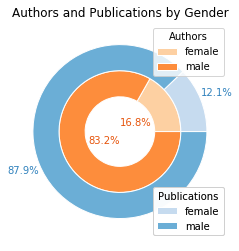

In [173]:
# Visualize totals of authors and publications by gender as a pie chart

# Nested pie plot: https://matplotlib.org/gallery/pie_and_polar_charts/nested_pie.html#sphx-glr-gallery-pie-and-polar-charts-nested-pie-py
# Labelling a pie chart: https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py
# Placing multiple legends: https://matplotlib.org/tutorials/intermediate/legend_guide.html

import numpy as np

fig, ax = plt.subplots()

size = 0.3

# Colors for the pie chart
cmap = plt.get_cmap("tab20c")
outer_colors = cmap([7,5]) # Publications
text_outer = cmap(4)
inner_colors = cmap(np.array([3, 1])) # Authors
text_inner = cmap(0)

# Authors
wedges_a, texts_a, autotexts_a = ax.pie(nauthors_by_gender.values, radius=1-size, 
                                        colors=outer_colors, autopct='%1.1f%%', # form of percentages
                                        pctdistance=0.3, # how far away are percentages from center?
                                        wedgeprops=dict(width=size, edgecolor='w'), # color of edges
                                        textprops=dict(color=text_outer)) # color of percentages
l_a = ax.legend(wedges_a, ["female", "male"], loc="upper right", title="Authors")
plt.gca().add_artist(l_a) # Add legend

# Publications
wedges_p, texts_p, autotexts_p = ax.pie(n_publs_by_gender['n_publs'], radius=1, 
                                        colors=inner_colors, autopct='%1.1f%%', 
                                        pctdistance=1.2,
                                        wedgeprops=dict(width=size, edgecolor='w'), 
                                        textprops=dict(color=text_inner))
l_p = ax.legend(wedges_p, ["female", "male"], loc="lower right", title="Publications")
plt.gca().add_artist(l_p)


plt.title('Authors and Publications by Gender')

plt.show()

In [11]:
# Relative values
n_publs_mean_by_gender = names.groupby("likely_gender").agg({'n_publs':'mean'})

In [12]:
print("On average, female authors publish {} pieces each, while male authors publish {} pieces each.".format(n_publs_mean_by_gender.at['female', 'n_publs'], n_publs_mean_by_gender.at['male', 'n_publs']))

On average, female authors publish 4.179795140001447 pieces each, while male authors publish 6.1144349705275856 pieces each.


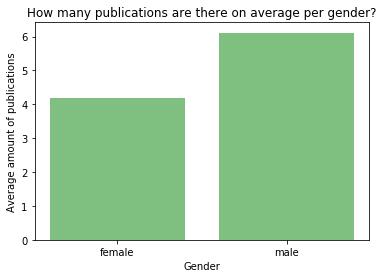

In [95]:
plt.bar(n_publs_mean_by_gender.index.values, n_publs_mean_by_gender['n_publs'], alpha=0.5, color='g')

plt.xlabel('Gender')
plt.ylabel('Average amount of publications')

plt.title("How many publications are there on average per gender?")
plt.show()

In [36]:
median = names['n_publs'].median()
f_median = names[names['likely_gender'] == 'female']['n_publs'].median()
m_median = names[names['likely_gender'] == 'male']['n_publs'].median()

mean = names['n_publs'].mean()
f_mean = names[names['likely_gender'] == 'female']['n_publs'].mean()
m_mean = names[names['likely_gender'] == 'male']['n_publs'].mean()

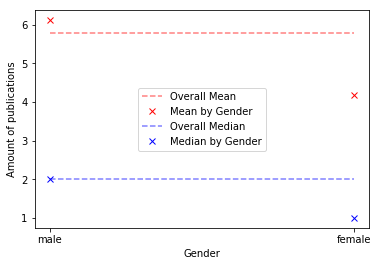

In [92]:
plt_mean = plt.plot(['male', 'female'], [mean, mean], 'r--', alpha=0.5, label='Overall Mean')
plt_g_mean = plt.plot(['male','female'], [m_mean, f_mean], 'rx', label='Mean by Gender')

plt_median = plt.plot(['male', 'female'],[median, median], 'b--', alpha=0.5, label='Overall Median')
plt_g_median = plt.plot(['male', 'female'],[m_median, f_median], 'bx', label='Median by Gender')

plt.xlabel('Gender')
plt.ylabel('Amount of publications')

plt.legend(loc="center")
plt.show()

In [41]:
f = names[names['likely_gender'] == 'female']
m = names[names['likely_gender'] == 'male']

{'whiskers': [<matplotlib.lines.Line2D at 0x220fb39a7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x220fb39ae80>,
 'boxes': [<matplotlib.lines.Line2D at 0x220fb39a3c8>,
 'medians': [<matplotlib.lines.Line2D at 0x2209fb06550>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x2209fb06898>,
  <matplotlib.lines.Line2D at 0x2209fb12fd0>]}

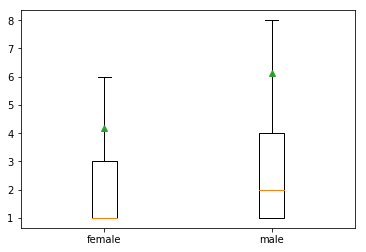

In [54]:
plt.boxplot([f['n_publs'], m['n_publs']], showfliers=False, labels=["female", "male"], showmeans=True)